<a href="https://colab.research.google.com/github/SadmanSakibFahim/PythonLearning/blob/main/Statistics_with_NumPy%2C_Scipy_and_Pandas_Module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Basic Probability with a Bernoulli distribution</h1>


In [ ]:
import random

# random.seed(42)
random.random() > 0.5

True

In [ ]:
[random.random() > 0.5 for _ in range(20)]

[False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False]

In [ ]:
from scipy.stats import bernoulli
import numpy as np
import pandas as pd

np.random.seed(42)
draws = bernoulli.rvs(p = 0.5, size = 100000)



In [ ]:
df = pd.DataFrame(draws, columns = ['Outcomes'])
df["Outcomes"].value_counts()

,count
Outcomes,
1,50066
0,49934


In [ ]:
df["Outcomes"].value_counts(normalize = True)

,proportion
Outcomes,
1,0.50066
0,0.49934


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

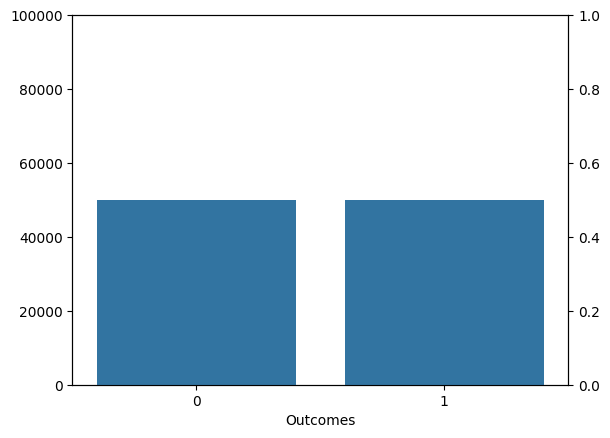

In [ ]:
counts = df["Outcomes"].value_counts()
freqs = df["Outcomes"].value_counts(normalize = True)

fig, ax1 = plt.subplots()
sns.barplot(x=counts.index, y=counts.values, ax = ax1)

ax2 = ax1.twinx()
sns.barplot(x=freqs.index, y=freqs.values, ax = ax2)

ax1.set_ylim(0, df.shape[0])
ax2.set_ylim(0, 1)

plt.show()

In [ ]:
def draw_bernoulli(p, n):
  draws = bernoulli.rvs(p = p, size = n)
  return pd.DataFrame(draws, columns = ["Outcome"])

def plotter(data, ax1):
  ax1.set_ylim(0, data.shape[0])
  counts = data["Outcome"].value_counts()
  colors = ['lightblue', 'darkblue']
  sns.barplot(x = counts.index, y = counts.values, ax = ax1, color = 'cyan', palette = colors)
  ax1.set(xlabel = None, ylabel = None)

  ax2 = ax1.twinx()
  freqs = data["Outcome"].value_counts(normalize = True)
  sns.barplot(x = freqs.index, y = freqs.values, ax = ax2, color = 'red', palette = colors)
  ax2.set(xlabel = None, ylabel = None)
  ax2.set_ylim(0, 1)

  # plt.show()



In [ ]:
df = draw_bernoulli(0.8, 10000000)

In [ ]:
df["Outcome"].value_counts(normalize = True)

,proportion
Outcome,
1,0.800042
0,0.199958


<ipython-input-9-8d86f45b849e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts.index, y = counts.values, ax = ax1, color = 'cyan', palette = colors)
<ipython-input-9-8d86f45b849e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freqs.index, y = freqs.values, ax = ax2, color = 'red', palette = colors)


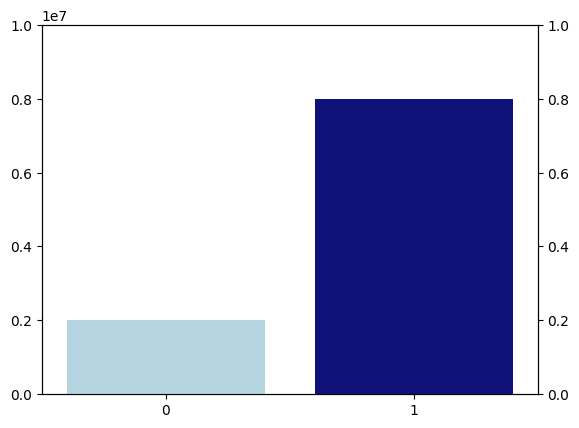

In [ ]:
plotter(df, plt.gca())

<ipython-input-9-8d86f45b849e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = counts.index, y = counts.values, ax = ax1, color = 'cyan', palette = colors)
<ipython-input-9-8d86f45b849e>:9: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x = counts.index, y = counts.values, ax = ax1, color = 'cyan', palette = colors)
<ipython-input-9-8d86f45b849e>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freqs.index, y = freqs.values, ax = ax2, color = 'red', palette = colors)
<ipython-input-9-8d86f45b849e>:14: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.barplot(x = freqs.in

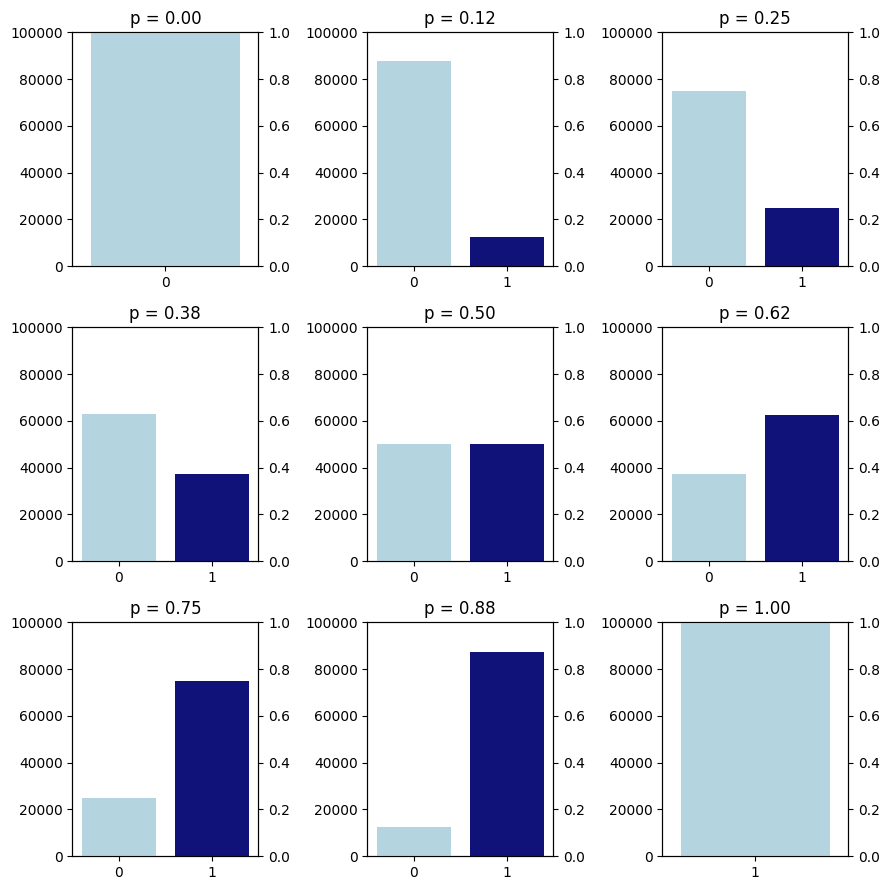

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (9, 9))

for i, p in enumerate(np.linspace(0, 1, 9)):
    plotter(draw_bernoulli(p, 100000), axs [i // 3, i % 3])
    axs[i // 3, i % 3].set_title(f'p = {p:.2f}')

plt.tight_layout()
plt.show()

In [ ]:
np.linspace(0,1,9)

array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ])

<h1> Discrete Data Distributions </h1>

In [ ]:
np.random.seed(42)

def sample_discrete(weights=[1,1,1,1,1,1], n=1000, labels=None):
  if not labels:
    labels = range(1, len(weights)+1)
  probs = weights/np.sum(weights)
  data = np.random.choice(labels, size = n, p = probs)
  df = pd.DataFrame(data, columns = ["outcome"])
  df["outcome"] = pd.Categorical(df["outcome"], categories=labels, ordered = True)
  return df

In [ ]:
labels = ['one', 'two', 'three', 'four', 'five', 'six']
sample_discrete(n = 10000, labels = labels)



,outcome
0,three
1,six
2,five
3,four
4,one
...,...
9995,six
9996,six
9997,six
9998,three


In [ ]:
sample_discrete(n = 1200000, labels = labels).outcome.value_counts().reindex((labels))

,count
outcome,
one,199262
two,200529
three,200008
four,200186
five,200145
six,199870


In [ ]:
def plot_discrete(data, ax1):
  colors = ['lightblue', 'darkblue', 'red', 'yellow','green','violet']
  counts = data["outcome"].value_counts()
  sns.barplot(x=counts.index, y=counts.values, ax = ax1, palette = colors)
  ax1.set_ylim(0, data.shape[0])
  ax2 = ax1.twinx()
  freqs = data["outcome"].value_counts(normalize = True)
  sns.barplot(x = freqs.index, y= freqs.values, ax = ax2, palette = colors)
  ax2.set_ylim(0, 1)


<ipython-input-18-3b5f14bd7bfc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax = ax1, palette = colors)
<ipython-input-18-3b5f14bd7bfc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freqs.index, y= freqs.values, ax = ax2, palette = colors)


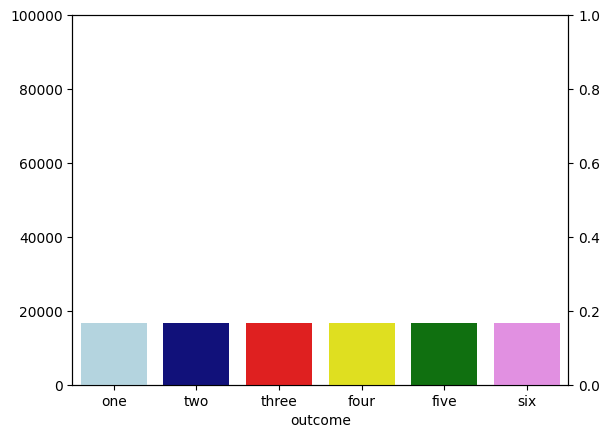

In [ ]:
plot_discrete(sample_discrete(n = 100000, labels = labels), plt.gca())

<ipython-input-18-3b5f14bd7bfc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax = ax1, palette = colors)
<ipython-input-18-3b5f14bd7bfc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freqs.index, y= freqs.values, ax = ax2, palette = colors)


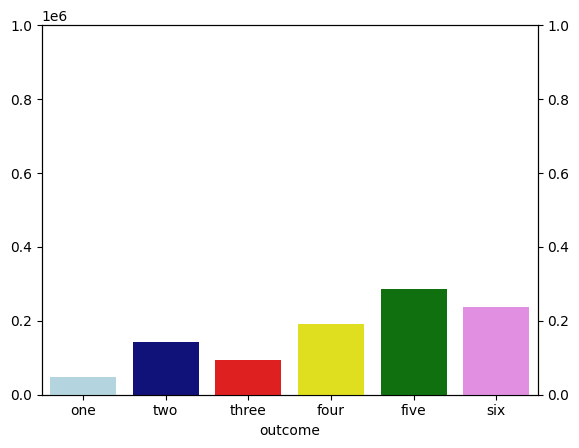

In [ ]:
unequal_weights  = [1, 3, 2, 4, 6, 5]
plot_discrete(sample_discrete(unequal_weights, n = int(1e6), labels = labels), plt.gca())

In [ ]:
def sample_poisson(lam = 1,  n=1000):
  data = np.random.poisson(lam = lam, size = n)
  return pd.DataFrame(data, columns = ["outcome"])


In [ ]:
sample_poisson(lam = 10, n= 10000)

,outcome
0,10
1,14
2,10
3,11
4,4
...,...
9995,17
9996,5
9997,9
9998,9


<ipython-input-18-3b5f14bd7bfc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax = ax1, palette = colors)
<ipython-input-18-3b5f14bd7bfc>:4: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x=counts.index, y=counts.values, ax = ax1, palette = colors)
<ipython-input-18-3b5f14bd7bfc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = freqs.index, y= freqs.values, ax = ax2, palette = colors)
<ipython-input-18-3b5f14bd7bfc>:8: UserWarning: 
The palette list has fewer values (6) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.barplo

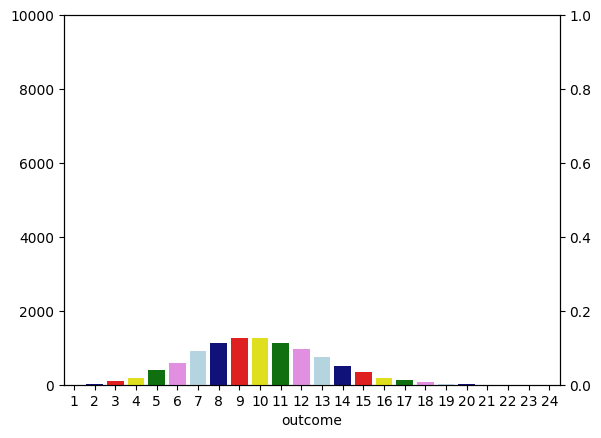

In [ ]:
plot_discrete(sample_poisson(lam = 10, n= 10000), plt.gca())

In [ ]:
from scipy import stats

In [ ]:
def sample_zipf(alpha, n=1000):
  data = stats.zipf.rvs(a = alpha, size = n)
  return pd.DataFrame(data, columns = ["outcome"])

In [ ]:
sample_zipf(1.1, 10000)

,outcome
0,74
1,2
2,131965
3,12
4,9454418
...,...
9995,130011
9996,31
9997,562
9998,20


In [ ]:
df = sample_zipf(1.2, 10000)
df["outcome"].value_counts().sort_index()

,count
outcome,
1,1750
2,824
3,490
4,360
5,261
...,...
362294376770189120,1
413677756720125120,1
476898210607337728,1


In [ ]:
def plot_zipf(data, ax1):
  counts = data["outcome"].value_counts()
  counts.index = range(1, len(counts)+1)
  ax1.set_yscale("log")
  ax1.set_xlim(1, len(counts))
  sns.barplot(x=counts.index, y=counts.values, ax = ax1)
  ticks = np.linspace(1, len(counts), 6, dtype = int)
  ax1.set_xticks(ticks)
  ax1.set_label("Rank")

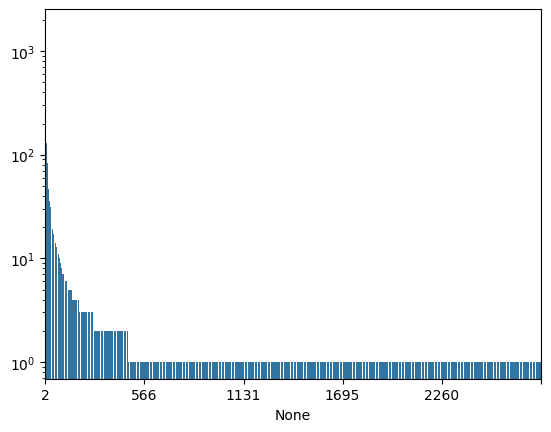

In [ ]:
plot_zipf(df, plt.gca())

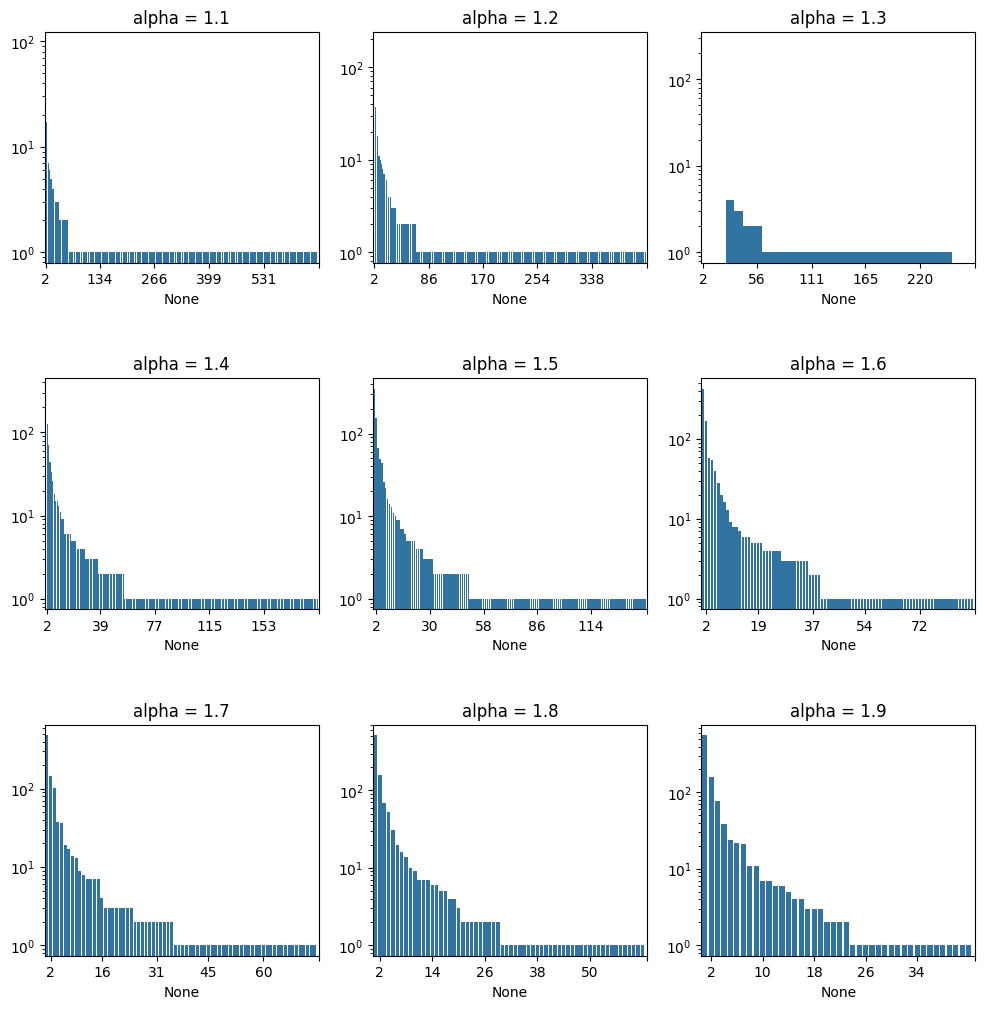

In [ ]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
for i, ax in enumerate(axs.ravel()):
    plot_zipf(sample_zipf(1+(i+1)/10, n = 1000), ax)
    ax.set_title(f"alpha = {1+(i+1)/10:.1f}")
plt.subplots_adjust(hspace = 0.5)

<h1> Continuous Data Distributions</h1>

In [ ]:
def sample_mix_of_two_betas(alpha1 = 1, beta1 = 5, alpha2 = 5, beta2 = 1, mix=0.5, n=1000):
    which = np.random.choice([1,2], size = n, p = [mix, 1-mix])
    b1 = np.random.beta(alpha1, beta1, n)
    b2 = np.random.beta(alpha2, beta2, n)
    df = pd.DataFrame({"outcome" : np.where(which == 1, b1, b2)})
    return df

In [ ]:
sample_mix_of_two_betas()

,outcome
0,0.297631
1,0.913042
2,0.361723
3,0.031969
4,0.963943
...,...
995,0.038391
996,0.939074
997,0.963655
998,0.890855


In [ ]:
data = sample_mix_of_two_betas(n=1000000)
bins = np.arange(0, 1.01, 0.01)
data["bin"], bin_ranges = pd.cut(data["outcome"], bins = bins, retbins = True)
data

,outcome,bin
0,0.224545,"(0.22, 0.23]"
1,0.028034,"(0.02, 0.03]"
2,0.247823,"(0.24, 0.25]"
3,0.198939,"(0.19, 0.2]"
4,0.669472,"(0.66, 0.67]"
...,...,...
999995,0.104789,"(0.1, 0.11]"
999996,0.198725,"(0.19, 0.2]"
999997,0.069413,"(0.06, 0.07]"
999998,0.202757,"(0.2, 0.21]"


In [ ]:
counts = data.groupby("bin", observed = False).size()

In [ ]:
counts

,0
bin,
"(0.0, 0.01]",24646
"(0.01, 0.02]",23641
"(0.02, 0.03]",22698
"(0.03, 0.04]",21299
"(0.04, 0.05]",20859
...,...
"(0.95, 0.96]",20906
"(0.96, 0.97]",21777
"(0.97, 0.98]",22905


In [ ]:
counts / counts.sum()

,0
bin,
"(0.0, 0.01]",0.024646
"(0.01, 0.02]",0.023641
"(0.02, 0.03]",0.022698
"(0.03, 0.04]",0.021299
"(0.04, 0.05]",0.020859
...,...
"(0.95, 0.96]",0.020906
"(0.96, 0.97]",0.021777
"(0.97, 0.98]",0.022905


In [ ]:
def plot_continuous(
    data, ax1, num_bins = 100, label_precision = 2, min_val =0, max_val =1, max_prob = None
):
    data = data[(data["outcome"] >= min_val) & (data["outcome"] <= max_val)]
    bin_edges =np.linspace(min_val, max_val, num_bins + 1)
    data["bin"], bin_ranges = pd.cut(data["outcome"], bins = bin_edges, retbins = True)
    counts = data.groupby("bin", observed = False).size()
    probs = counts/counts.sum()
    left_edges = bin_ranges[:-1]
    labels = np.round(left_edges, label_precision)
    sns.barplot(x=labels, y=probs, ax = ax1)

    if max_prob:
      ax1.set_ylim(0, max_prob)

    for ind, label in enumerate(ax1.get_xticklabels()):
      if ind % 100 == 0:
        label.set_visible(True)
      else:
        label.set_visible(False)

    ax1.set_ylabel("Probability")



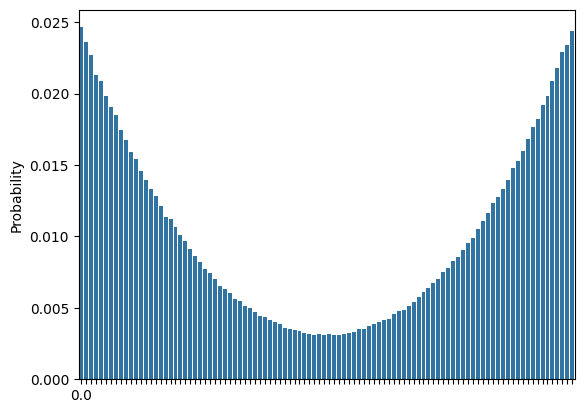

In [ ]:
plot_continuous(data, plt.gca())

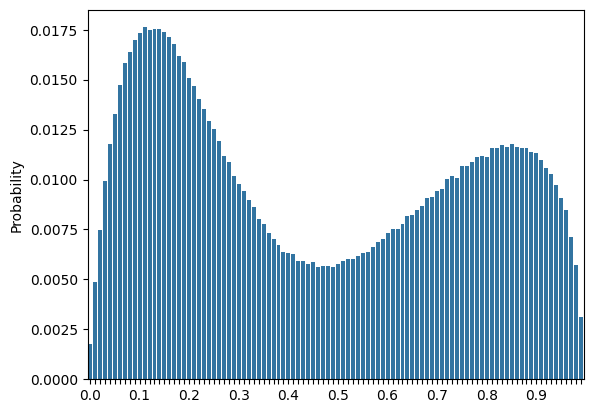

In [ ]:
plot_continuous(
    sample_mix_of_two_betas(2, 8, 4, 1.5, 0.5, 1000000), plt.gca(), num_bins = 100, label_precision = 2, min_val =0, max_val =1, max_prob = None
)

In [ ]:
def sample_uniform(low = 0.0, high = 1.0, n = 1000):
  return pd.DataFrame({"outcome":np.random.uniform(low = low, high = high, size = n)})

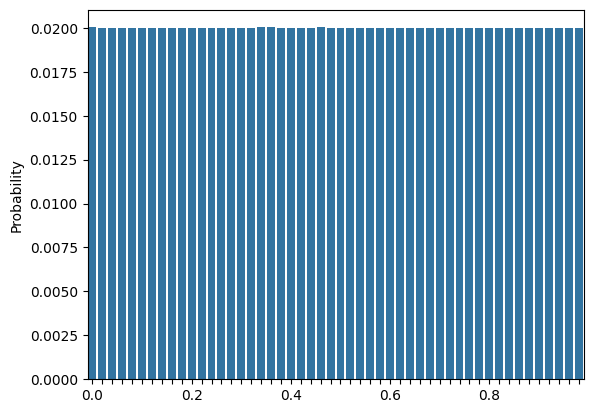

In [ ]:
plot_continuous(sample_uniform(n=100000000), plt.gca(), num_bins = 50)

In [ ]:
df = sample_uniform(low=1, high=11, n=10000000)
df["outcome"].min(), df["outcome"].max()

(1.0000046219247118, 10.999999677704476)

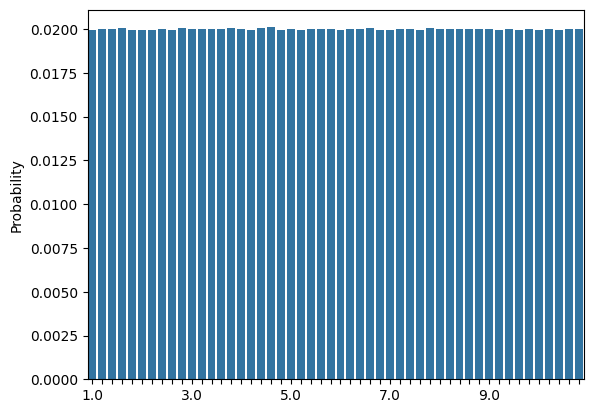

In [ ]:
plot_continuous(
    df,
    plt.gca(),
    num_bins = 50,
    min_val = 1,
    max_val = 11)

In [ ]:
def sample_normal(mu=0, sigma=1, n=100000):
  return pd.DataFrame({"outcome":np.random.normal(loc = mu, scale = sigma, size = n)})


In [ ]:
sample_normal(n=20)

,outcome
0,-0.265440
1,1.058150
2,0.060689
3,-2.051955
4,4.088417
5,1.843653
6,-1.720676
7,-0.694568
8,-0.547505
9,1.385812


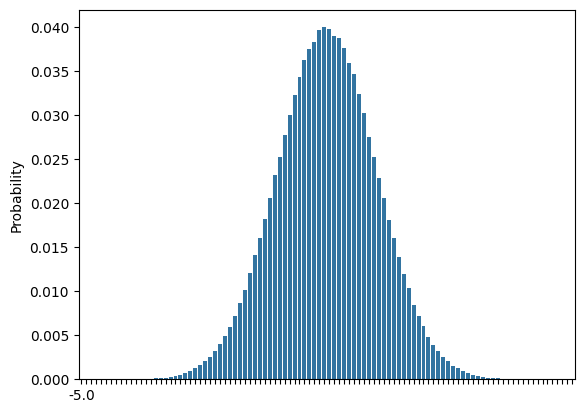

In [ ]:
plot_continuous(sample_normal(n=1000000), plt.gca(), num_bins = 100, min_val=-5, max_val=5, label_precision=2)

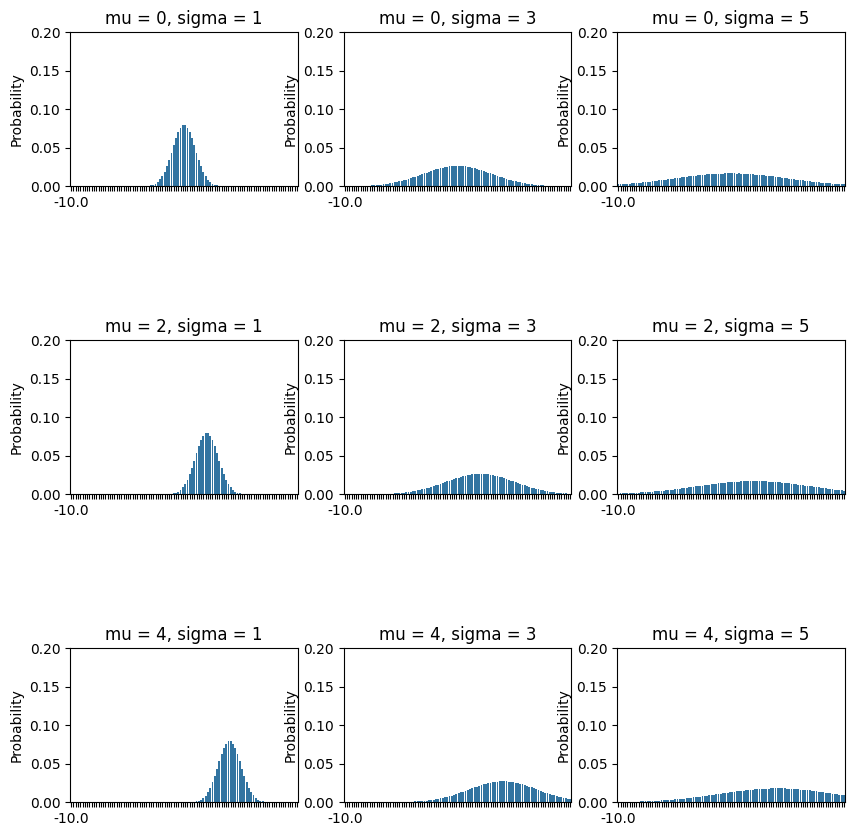

In [ ]:
fig, axs = plt.subplots(3,3, figsize = (10, 10))
for i, mu in enumerate([0,2,4]):
  for j, sigma in enumerate([1,3,5]):
    plot_continuous(
        sample_normal(mu = mu, sigma = sigma, n=10000000),
        axs[i, j],
        num_bins = 100,
        min_val = -10,
        max_val = 10,
        max_prob = 0.2,
        label_precision = 1
    )
    axs[i,j].set_title(f"mu = {mu}, sigma = {sigma}")

plt.subplots_adjust(hspace=1)

In [ ]:
def sample_exponential(lam=1, n=1000):
  return pd.DataFrame({"outcome" : np.random.exponential(scale = 1/lam, size = n)})

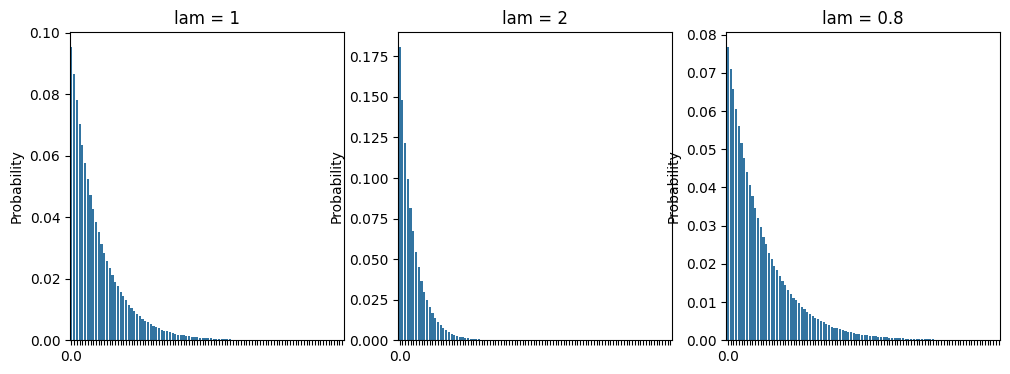

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = (12,4))
for i, lam in enumerate([1, 2, 0.8]):
      plot_continuous(
        sample_exponential(lam = lam, n = 1000000),
        axs[i],
        num_bins = 100,
        min_val = 0,
        max_val = 10,
        label_precision = 1
      )
      axs[i].set_title(f"lam = {lam}")